### Use-case: A shopping mall company has provided you this dataset. They want to create new strategy for enhancing the sales figure

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
#To view the graph in jupyter notebook

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.columns = ['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
#Visual EDA
#Initially perform EDA only with numeric columns

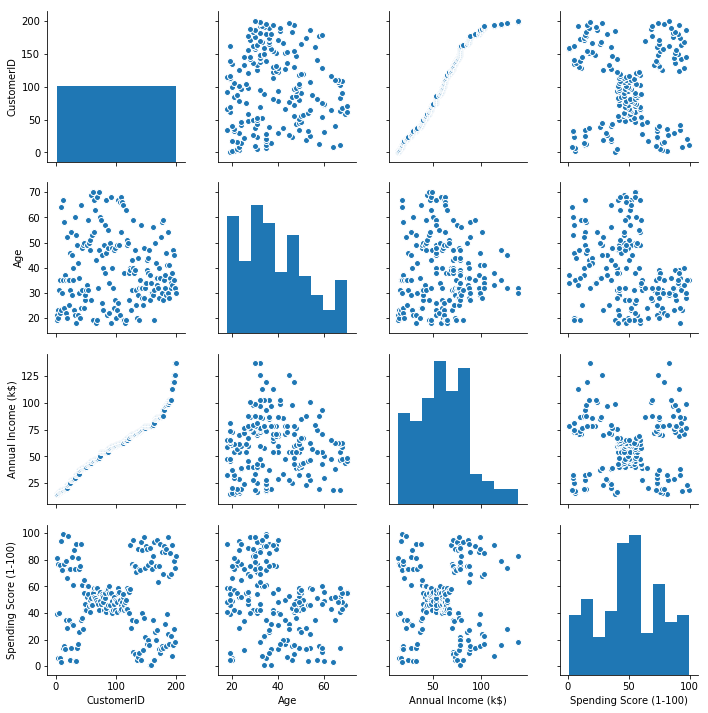

In [11]:
sns.pairplot(data) #He will only plot numerical values. He will ignore non-numeric colns

In [12]:
# CustomerID v/s Spending Score
# Age v/s Spending Score
# Annual Income v/s Spending

In [13]:
# Annual Income v/s Spending Score
#Here on the basis of Visual EDA we consider k = 5

In [14]:
#Create Feature numpy array
features = data.iloc[:,[3,4]].values

In [15]:
#Implement KMeans on features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5) #On the basis of EDA, k=5
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
group = model.predict(features)

In [22]:
finalDataSet = data
finalDataSet['group']=group
finalDataSet.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
5,6,Female,22,17,76,0
6,7,Female,35,18,6,3
7,8,Female,23,18,94,0
8,9,Male,64,19,3,3
9,10,Female,30,19,72,0


[]

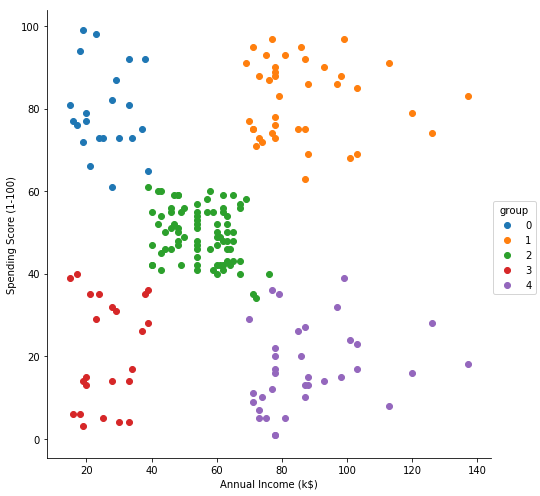

In [20]:
sns.FacetGrid(finalDataSet, hue='group', size=7 )\
   .map(plt.scatter, "Annual Income (k$)", "Spending Score (1-100)") \
   .add_legend()
plt.plot()

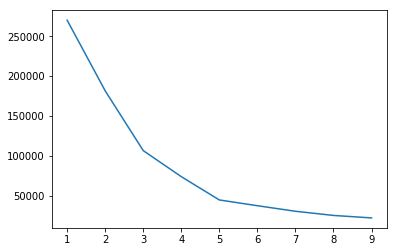

In [26]:
#You can verify whether the k was really ideal or not !!!
#Elbow Method
# For each k value we will plot the error rate(misclassification rate)
# using a formula (WCSS - WithIn Cluster Sum of Squares)

from sklearn.cluster import KMeans
errorValues = []

for i in range(1,10):
    m1 = KMeans(n_clusters=i)
    m1.fit(features)
    errorValues.append(m1.inertia_)

plt.plot(range(1,10) , errorValues)
    
    